# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Third Session: From Probability to Statistics 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 04 October 2016</span>


### Topics to be discussed 

* Probability Distributions
* Functions of random variables
* Law of Large Numbers
* Central Limit Theorem
* Important statistical notions
    * expected value (average)
    * variance
    * median
    * mode
    * higher order statistics
        * skewness and tails
        * kutrosis
        * momentoms
    * covariance
    * scatter matrix
    * correlation
* Density Learning 




In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline
from bokeh.models import CustomJS, ColumnDataSource, Slider,TextInput
from bokeh.models import TapTool, CustomJS, ColumnDataSource
from bokeh.layouts import column
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.plotting import Figure, output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider
from bokeh.io import push_notebook
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)
output_notebook()
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show

Loading BokehJS ...

# Some Experiments with random variables and known distributions

![](Images/PDFSandPMFS.png)

<a></a>

### Binomial distribution

average number of success in 10000 times play is 1.0141


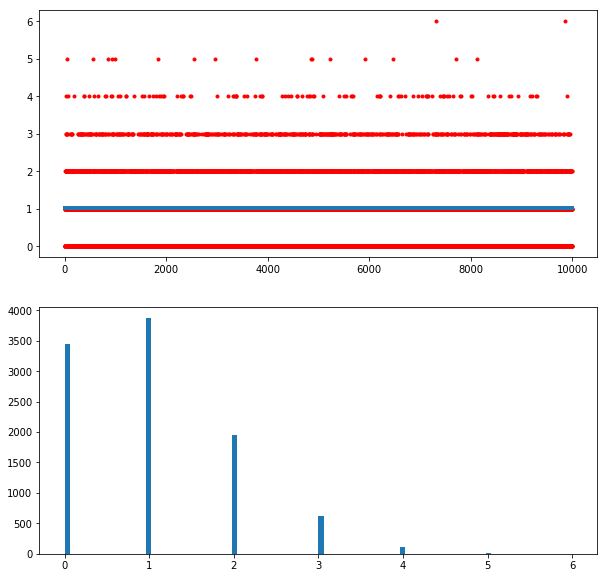

In [2]:

# Imagine you play a game 10 times and you want to know your expected number of success
N = 10000
p = .1

X = [np.random.binomial(10,p) for i in range(N)]

fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
print 'average number of success in {} times play is {}'.format(N,S_avg)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

### Geometric Distribution

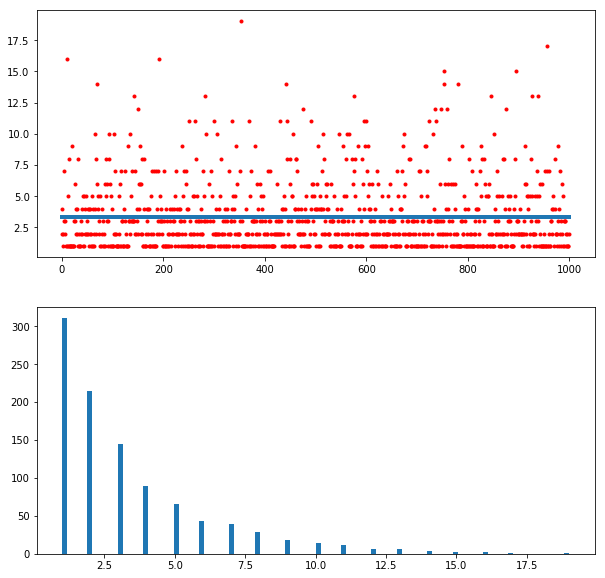

In [3]:

N  = 1000
p = .3

# Geometric distribution is when we stop the game after the first win. Therefore, it is a measure of number of games
X = np.random.geometric(p,size=N)


fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

### Uniform Distribution

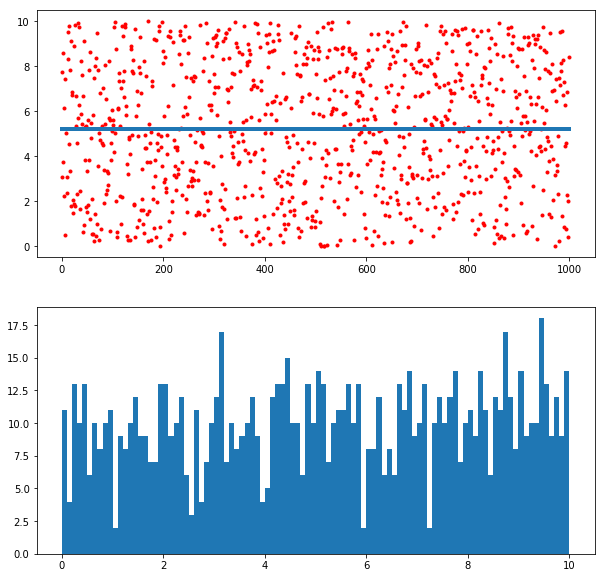

In [4]:

N  = 1000
l= 0
h = 10

X = np.random.uniform(low=l, high=h, size=N)

fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

### Gaussian (Normal) distribution

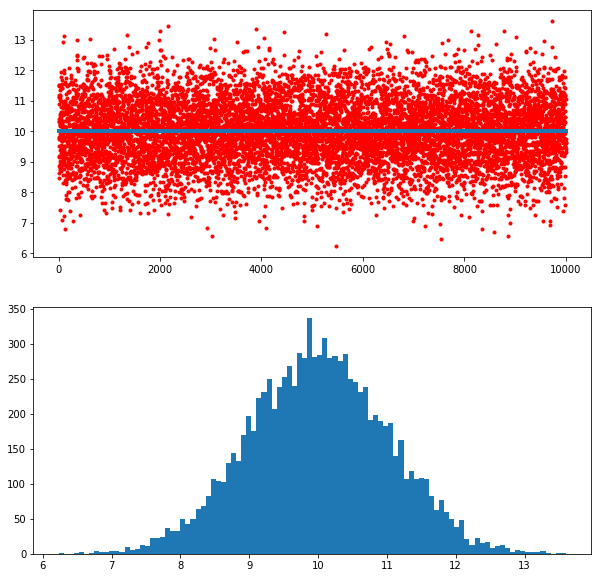

In [5]:
m = 10
s = 1
N  = 10000
X = np.random.normal(loc=m, scale=s, size=N)


fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

## A note on Functions of Random numbers
* imagine we know the distribution of two variables and we want to know the distribution of a function of those variables. For example, imagine we know the quality of a product of a machine depends on the temperature and pressure of tool head:
## $$ y = 2t^2 + 3p^3 $$ 



### Arithmetic of random variables are quickly get complex, but Algebra of random variables: symbolic manipulation of random variables. This goes to the direction of quantum theory


<span style="color:red;font-size: 2em;line-height: 100%;"> This is interesting, because similar to "deterministic systems", even with knowing the relations and the distributions of random variables it is not easy to "analytically" see the distribution of functions of random variables and the usual choice is to simulate </span>

#### An example to the analytical approach:
* Sum of two normally distributed random variables : https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables


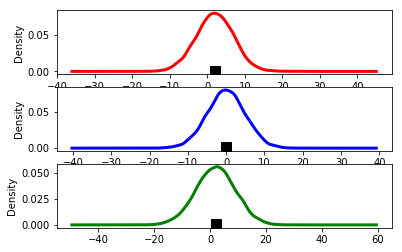

In [6]:
N = 10000
x1= np.random.normal(loc=2,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = x1+x2


Data= np.concatenate((x1,x2,y),axis=1)
DF = pd.DataFrame(data=Data,columns=['x1','x2','y'])



ax1= plt.subplot(3,1,1)
DF['x1'].plot(ax=ax1,kind='kde',linewidth=3,color='red',style='-')
# plt.plot(DF['x1'].values[:].mean(),0,'sr',markersize=30)
plt.plot(DF['x1'].values[:].mean(),0.001,'sk',markersize=10);

ax2= plt.subplot(3,1,2)
DF['x2'].plot(ax=ax2,kind='kde',linewidth=3,color='blue',style='-')
# plt.plot(DF['x2'].values[:].mean(),0,'sb',markersize=30)
plt.plot(DF['x2'].values[:].mean(),0.001,'sk',markersize=10);


ax3= plt.subplot(3,1,3)
DF['y'].plot(ax=ax3,kind='kde',linewidth=3,color='g',style='-')
plt.plot(DF['y'].values[:].mean(),0.001,'sk',markersize=10);


## Adding a bit of nonlinearity

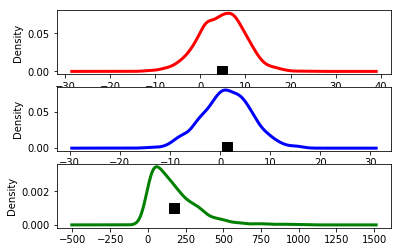

In [7]:
N = 1000


# change the center of random variables and look at the distribution of y
x1= np.random.normal(loc=5,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=1,scale=5,size=N)[:,np.newaxis]

y = 2* x1*x1 +3*x2*x2

# y = -2*x1*x1 + np.random.normal(loc=1.0, scale=5.1, size=N)[:,np.newaxis]

# y = x1/x1[::-1]
Data= np.concatenate((x1,x2,y),axis=1)
DF = pd.DataFrame(data=Data,columns=['x1','x2','y'])



ax1= plt.subplot(3,1,1)
DF['x1'].plot(ax=ax1,kind='kde',linewidth=3,color='red',style='-')
# plt.plot(DF['x1'].values[:].mean(),0,'sr',markersize=30)
plt.plot(DF['x1'].values[:].mean(),0.001,'sk',markersize=10);

ax2= plt.subplot(3,1,2)
DF['x2'].plot(ax=ax2,kind='kde',linewidth=3,color='blue',style='-')
# plt.plot(DF['x2'].values[:].mean(),0,'sb',markersize=30)
plt.plot(DF['x2'].values[:].mean(),0.001,'sk',markersize=10);


ax3= plt.subplot(3,1,3)
DF['y'].plot(ax=ax3,kind='kde',linewidth=3,color='g',style='-')
plt.plot(DF['y'].values[:].mean(),0.001,'sk',markersize=10);


### If we imagine that the parameters of x1 and x2 are design variables and y is the objective function we want to minimize. Since there is no closed form distribution for y we usually  need simulation based optimization.
## <a></a>


<span style="color:red;font-size: 2em;line-height: 100%;"> However, in Data Driven Modeling we are one step behind this. </span>

<span style="color:darkblue;font-size: 2em;line-height: 100%;"> There, we have another problem, where in addition to random variables, we have "uncertain relations".  </span>
### This means:
* We don't know the important variables toward our question. 
* Their distributions are not known
* And the inter-relations are not known too.
* **But we just have data** 

### Therefore, we usually have a backward scenario, where we observe all the variables together and usually there is no prior knowledge about them

## This is the shift from probability theory to statistics and later to machine learning

#### Therefore, historically, there have been many theoretical works, in order to use probabilty theory, when we only have observations. Two of the most important works are:
* ** Law of Large Numbers**
* ** Central Limit Theorem**

# <a></a>
# <a></a>
# <a></a>

# Law of Large Numbers

https://en.wikipedia.org/wiki/Law_of_large_numbers
### What is the limiting distribution of a process, if there is a underlying system behind it?
### More generally, if we have more data we have more accurate estimations?! Maybe the fisrt work on Big Data!


# <a></a>
<center> flipping a coin sequentially and independently </center>
![](https://upload.wikimedia.org/wikipedia/commons/4/49/Lawoflargenumbersanimation2.gif)


## A bit of history
From Wikipedia: The Italian mathematician **Gerolamo Cardano (1501–1576)** stated without proof that the accuracies of empirical statistics tend to improve with the number of trials. This was then formalized as a law of large numbers. A special form of the LLN (for a binary random variable) was first proved by **Jacob Bernoulli**.It took him over 20 years to develop a sufficiently rigorous mathematical proof which was published in his Ars Conjectandi (The Art of Conjecturing) in **1713**. He named this his "Golden Theorem" but it became generally known as "Bernoulli's Theorem". This should not be confused with Bernoulli's principle, named after Jacob Bernoulli's nephew Daniel Bernoulli. In **1837**, **S.D. Poisson** further described it under the name "la loi des grands nombres" ("The law of large numbers"). Thereafter, it was known under both names, but the "Law of large numbers" is most frequently used.

# <a></a>
# <a></a>







### Flipping a coin simulation

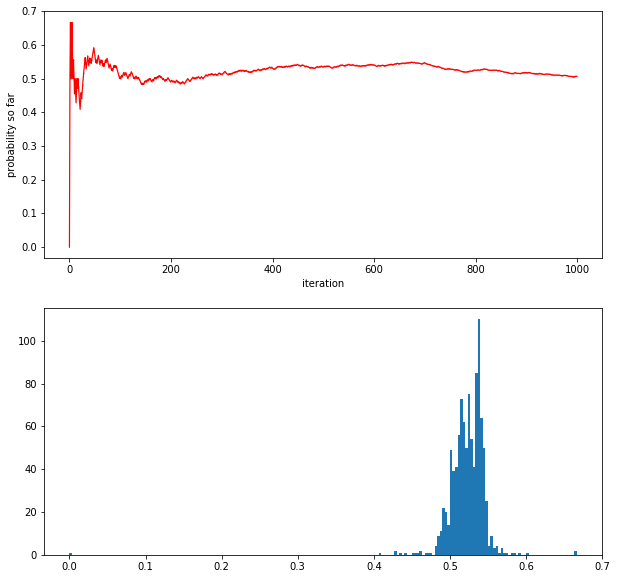

In [8]:
#Here, probability is a matter of belief
def cointoss_LLN(n_times=50):
    #We flip "n_times" a coin assuming the chance of wining is p
    p = .5
    outcomes = [np.random.binomial(1,np.random.rand()) for i in range(n_times)]
#     outcomes = [np.random.binomial(1,p) for i in range(n_times)]
    avg_P_H = (np.cumsum(outcomes)).astype(float)/range(1,n_times+1)
    return avg_P_H


#Here we expect .5
#Change the n_times and see what happens
avg_P_H = cointoss_LLN(n_times=1000)

fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(range(len(avg_P_H)),avg_P_H,'.-r',markersize=.2,linewidth=1.2);
plt.xlabel('iteration')
plt.ylabel('probability so far')
plt.subplot(2,1,2)
plt.hist(avg_P_H,bins=200);

# Central Limit Theorem (CLT)
## The distribution of "expected value" of any random distribution


## A bit of history
From wikipedia:
The central limit theorem has an interesting history. The first version of this theorem was postulated by the French-born mathematician **Abraham de Moivre** who, in a remarkable article published in **1733**, used the normal distribution to approximate the distribution of the number of heads resulting from many tosses of a fair coin. This finding was far ahead of its time, and was nearly forgotten until the famous French mathematician **Pierre-Simon Laplace** rescued it from obscurity in his monumental work Théorie analytique des probabilités, which was published in **1812**. Laplace expanded De Moivre's finding by approximating the binomial distribution with the normal distribution. But as with De Moivre, Laplace's finding received little attention in his own time. It was not until the nineteenth century was at an end that the importance of the central limit theorem was discerned, when, in **1901**, Russian mathematician **Aleksandr Lyapunov** defined it in general terms and proved precisely how it worked mathematically. Nowadays, the central limit theorem is considered to be the unofficial sovereign of probability theory.
## Important point: 
* CLT is about the distribution of **mean values** of any large sample
* CLT is the essense of majority of statistical tests

In [9]:
def run_experiment_N_time(n_each_test=500,n_repeat_test=100,test='bernoulli'):
    if test== 'bernoulli':
        p = .5
        all_P_H = [np.random.binomial(n_each_test,p)/float(n_each_test) for i in range(n_repeat_test)]
        return all_P_H
    
    if test== 'uniform':
        l = 0
        u = 10
        all_P_H = [np.random.uniform(low=l, high=u, size=n_each_test).mean() for i in range(n_repeat_test)]
        return all_P_H
    
    if test== 'geometric':
        p = .1
        all_P_H = [np.random.geometric(p,size=n_each_test).mean() for i in range(n_repeat_test)]
        return all_P_H
    
    if test== 'gaussian':
        m = 0
        s = 1
        all_P_H = [np.random.normal(loc=m, scale=s, size=n_each_test).mean() for i in range(n_repeat_test)]
        return all_P_H

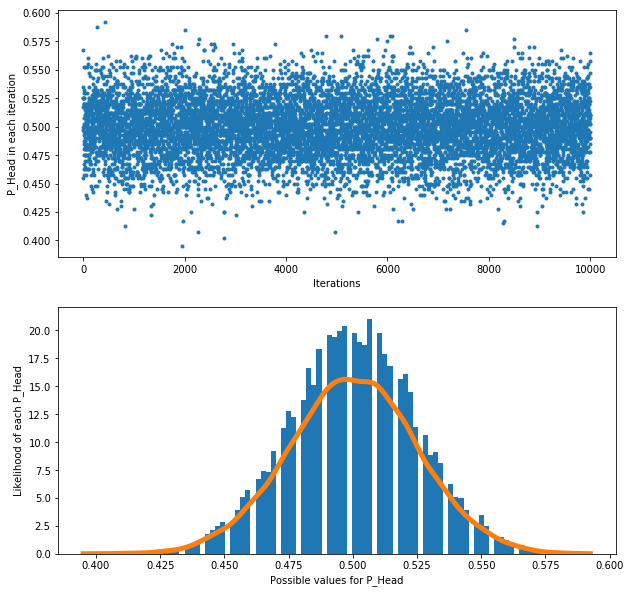

In [10]:

n_each_test = 400

#Increase the number of observations
n_repeat_test = 10000
# all_P_H = [cointoss(n_times=n_each_test) for i in range(n_repeat_test)]


all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='bernoulli')
# all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='uniform')
# all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='geometric')
# all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='gaussian')
fig = plt.figure(figsize=(10,10));
plt.subplot(2,1,1);
plt.plot(all_P_H,'.');
plt.xlabel('Iterations');
plt.ylabel('P_Head in each iteration');

plt.subplot(2,1,2);
plt.hist(all_P_H,bins=100,normed=True);
plt.xlabel('Possible values for P_Head');
plt.ylabel('Likelihood of each P_Head');

from scipy import stats
kernel = stats.gaussian_kde(all_P_H)
mn = np.min(all_P_H)
mx = np.max(all_P_H)
val_grids = np.linspace(mn,mx,num=1000).ravel()
Z = kernel(val_grids)

plt.plot(val_grids,Z,linewidth=5);

# Important terms in statistics (for single variable)
* expected value (average)
* variance
* median
* mode 
* box plot
* histograms

* higher order statistics
    * skewness and tails
    * kutrosis
    * momentoms


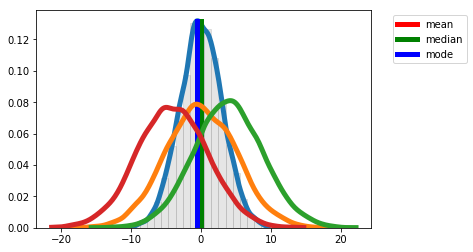

In [11]:
N  = 10000
X = np.random.normal(loc=0,scale=3,size=N)[:,np.newaxis]
# X = np.random.beta(1,5,size=N)[:,np.newaxis]
# X = np.random.uniform(low=0, high=4, size=N)[:,np.newaxis]

val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);
a = plt.hist(X,bins=20,normed=True,color='gray',alpha=.2, edgecolor='gray');

plt.plot([np.mean(X),np.mean(X)],[0,Z.max()],'r',label='mean',linewidth=5);
plt.plot([np.median(X),np.median(X)],[0,Z.max()],'g',label='median',linewidth=5);
plt.plot([val_grids[np.argmax(Z)],val_grids[np.argmax(Z)]],[0,Z.max()],'b',label='mode',linewidth=5);



X = np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);



X = np.random.normal(loc=4,scale=5,size=N)[:,np.newaxis]
val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);

X = np.random.normal(loc=-4,scale=5,size=N)[:,np.newaxis]
val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);

plt.legend(bbox_to_anchor=(1.3,1.));

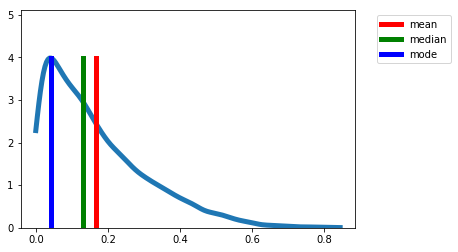

In [12]:
N  = 10000
X = np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
X = np.random.beta(1,5,size=N)[:,np.newaxis]
# X = np.random.uniform(low=0, high=4, size=N)[:,np.newaxis]

val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);
a = plt.hist(X,bins=100,normed=True,color='w');

plt.plot([np.mean(X),np.mean(X)],[0,Z.max()],'r',label='mean',linewidth=5);
plt.plot([np.median(X),np.median(X)],[0,Z.max()],'g',label='median',linewidth=5);
plt.plot([val_grids[np.argmax(Z)],val_grids[np.argmax(Z)]],[0,Z.max()],'b',label='mode',linewidth=5);
# plt.plot([a[1][np.argmax(a[0])],a[1][np.argmax(a[0])]],[0,Z.max()],'b',label='mode',linewidth=5);




plt.legend(bbox_to_anchor=(1.3,1.));

# Higher Order Statistics (HOS)
### Studying the shape of distributions
### Explaining statistics based on the terms from physics

### Momentums
#  $$m_k = \frac{1}{n} \sum_{i = 1}^n (x_i - \bar{x})^k$$

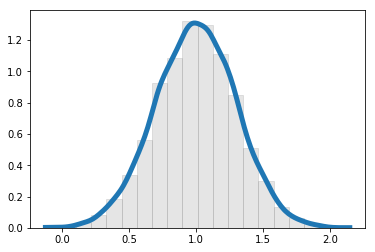

In [13]:
N  = 10000

X = np.random.normal(loc=1,scale=.3,size=N)[:,np.newaxis]
# X = np.random.beta(1,5,size=N)[:,np.newaxis]
# X = np.random.uniform(low=0, high=4, size=N)[:,np.newaxis]

val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);
# a = plt.hist(X,bins=100,normed=True,color='w');
a = plt.hist(X,bins=20,normed=True,color='gray',alpha=.2, edgecolor='gray');






plt.legend(bbox_to_anchor=(1.3,1.));

In [14]:
print 'mean value is {}'.format(X.mean())

print 'First moement {}'.format(stats.moment(X,moment=1)[0])


print 'Second moement: to show the level of variance to the first moment '
print 'variance is {}'.format(np.power(np.std(X),2))
print 'Variance is {}'.format(stats.moment(X,moment=2)[0])
print '\n'

print 'Third moment: to measure the skewness (inequity) of the distribution'
print 'skewness is {}'.format(stats.skew(X)[0])
print 'skewness is {}'.format(stats.moment(X,moment=3)[0]/np.power(np.std(X),3))
print 'skewness is {}'.format(stats.moment(X,moment=3)[0]/np.power(stats.moment(X,moment=2)[0],3/2.))

print '\n'


print 'Fourth moement: to show how compact (tailed) is the distribution'
print 'Kurtosis is {}'.format(stats.kurtosis(X)[0])
print 'Kurtosis is {}'.format(stats.moment(X,moment=4)[0]/np.power(stats.moment(X,moment=2)[0],2)-3)


mean value is 0.997644698289
First moement 0.0
Second moement: to show the level of variance to the first moment 
variance is 0.0898649110884
Variance is 0.0898649110884


Third moment: to measure the skewness (inequity) of the distribution
skewness is -0.0326342895173
skewness is -0.0326342895173
skewness is -0.0326342895173


Fourth moement: to show how compact (tailed) is the distribution
Kurtosis is -0.0315849298331
Kurtosis is -0.0315849298331


## Now let's play with these measures, by replacity mean value by any other values
#  $$m_k = \frac{1}{n} \sum_{i = 1}^n (x_i - \bar{x})^k$$

0.997636319191
0.992760840188
-0.122703402556
-0.122703402556


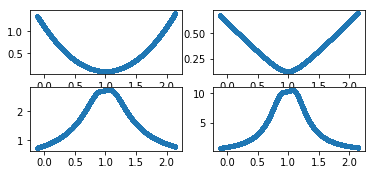

In [15]:
def dist_c(X,c):
    return np.power((X-c),2)
#     return np.abs(X-c)

val_grids = np.linspace(X.min(),X.max(),num=20000)
# X1  = dist_c(X,0)

Optimum_p = []
Optimum_ind = []
plt.subplot(3,2,1)
Dists = [dist_c(X,c) for c in val_grids]
#First moment
mean_dist = [np.mean(D) for D in Dists] 
plt.plot(val_grids,mean_dist,'.')
print val_grids[np.argmin(mean_dist)]
Optimum_p.append(val_grids[np.argmin(np.abs(mean_dist))])
Optimum_ind.append(np.argmin(np.abs(mean_dist)))

plt.subplot(3,2,2)

second_m = [np.std(D) for D in Dists]
# second_m = [stats.moment(D,moment=2) for D in Dists]
plt.plot(val_grids,second_m,'.')
print val_grids[np.argmin(np.abs(second_m))]
Optimum_p.append(val_grids[np.argmin(np.abs(second_m))])
Optimum_ind.append(np.argmin(np.abs(second_m)))

plt.subplot(3,2,3)
third_m = [stats.skew(D)[0] for D in Dists]
# third_m = [stats.moment(D,moment=3)[0]/np.power(np.std(D),3) for D in Dists]

plt.plot(val_grids,np.abs(third_m),'.')
print val_grids[np.argmin(np.abs(third_m))]
Optimum_p.append(val_grids[np.argmin(np.abs(third_m))])
Optimum_ind.append(np.argmin(np.abs(third_m)))

plt.subplot(3,2,4)

fourth_m = [stats.kurtosis(D)[0] for D in Dists]
# fourth_m = [stats.moment(D,moment=4) for D in Dists]
plt.plot(val_grids,fourth_m,'.')
print val_grids[np.argmin(np.abs(fourth_m))]

Optimum_p.append(val_grids[np.argmin(np.abs(fourth_m))])
Optimum_ind.append(np.argmin(np.abs(fourth_m)))


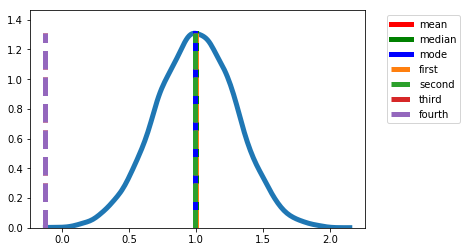

In [16]:
val_grids = np.linspace(X.min(),X.max(),num=200)
kernel = stats.gaussian_kde(X[:,0])
Z = kernel(val_grids)
plt.plot(val_grids,Z,linewidth=5);
a = plt.hist(X,bins=100,normed=True,color='w');

plt.plot([np.mean(X),np.mean(X)],[0,Z.max()],'r',label='mean',linewidth=5);
plt.plot([np.median(X),np.median(X)],[0,Z.max()],'g',label='median',linewidth=5);
plt.plot([val_grids[np.argmax(Z)],val_grids[np.argmax(Z)]],[0,Z.max()],'b',label='mode',linewidth=5);
# plt.plot([a[1][np.argmax(a[0])],a[1][np.argmax(a[0])]],[0,Z.max()],'b',label='mode',linewidth=5);


plt.plot([Optimum_p[0],Optimum_p[0]],[0,Z.max()],'--',label='first',linewidth=5);
plt.plot([Optimum_p[1],Optimum_p[1]],[0,Z.max()],'--',label='second',linewidth=5);
plt.plot([Optimum_p[2],Optimum_p[2]],[0,Z.max()],'--',label='third',linewidth=5);
plt.plot([Optimum_p[3],Optimum_p[3]],[0,Z.max()],'--',label='fourth',linewidth=5);





plt.legend(bbox_to_anchor=(1.3,1.));

first momentum optimization: minimizing the average
mean: 0.0898649111586, std: 0.126080547907, skewness: 2.70821458939, kurtosis: 10.3585507896
second momentum optimization: minimizing the variance
mean: 0.0898887631584, std: 0.126046552608, skewness: 2.70678236579, kurtosis: 10.3434293637
third momentum optimization: minimizing the inequity
mean: 1.34504477816, std: 0.680546147662, skewness: 0.736880777207, kurtosis: 0.682330921564
fourth momentum optimization: maximizing the compactness
mean: 1.34504477816, std: 0.680546147662, skewness: 0.736880777207, kurtosis: 0.682330921564


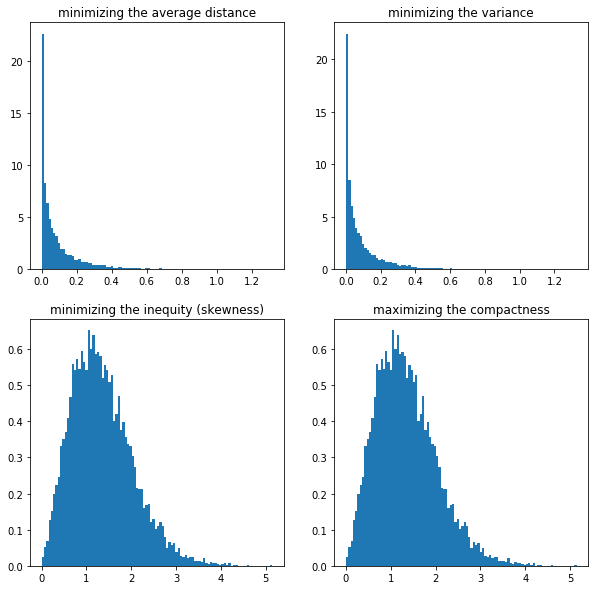

In [17]:
# Now we want to see the distributions around the optimum values of each momentum as a function



fig = plt.figure(figsize=(10,10))

plt.subplot(2,2,1);
sample = Dists[Optimum_ind[0]]
plt.hist(sample,bins=100,normed=True);
print 'first momentum optimization: minimizing the average'
print 'mean: {}, std: {}, skewness: {}, kurtosis: {}'.format(sample.mean(),np.std(sample),stats.skew(sample)[0],stats.kurtosis(sample)[0])
plt.title('minimizing the average distance')


plt.subplot(2,2,2);
sample = Dists[Optimum_ind[1]]
plt.hist(sample,bins=100,normed=True);
print 'second momentum optimization: minimizing the variance'
print 'mean: {}, std: {}, skewness: {}, kurtosis: {}'.format(sample.mean(),np.std(sample),stats.skew(sample)[0],stats.kurtosis(sample)[0])
plt.title('minimizing the variance')

plt.subplot(2,2,3);
sample = Dists[Optimum_ind[2]]
plt.hist(sample,bins=100,normed=True);
print 'third momentum optimization: minimizing the inequity'
print 'mean: {}, std: {}, skewness: {}, kurtosis: {}'.format(sample.mean(),np.std(sample),stats.skew(sample)[0],stats.kurtosis(sample)[0])                                                             
plt.title('minimizing the inequity (skewness)')

plt.subplot(2,2,4);
sample = Dists[Optimum_ind[3]]
plt.hist(sample,bins=100,normed=True);
print 'fourth momentum optimization: maximizing the compactness'
print 'mean: {}, std: {}, skewness: {}, kurtosis: {}'.format(sample.mean(),np.std(sample),stats.skew(sample)[0],stats.kurtosis(sample)[0])
plt.title('maximizing the compactness');

#### What does these measure imply for example in the context of governance? 
* socialism? 
* capitalism? 
* Income distribution for example

# <a></a>
## Interpreting the higher order statistics from the point of view of optimization
* What does sample mean in terms of optimization? 
* what do each of momentums mean?
* **Sample mean is the optimum value if we minimize the first order momentum of data!**
* Equity objectives


### Another example with higher dimensional data
    * Imagine the dots are the distribution of the houses in a city.
    * And we are interested to locate one shop in the city.

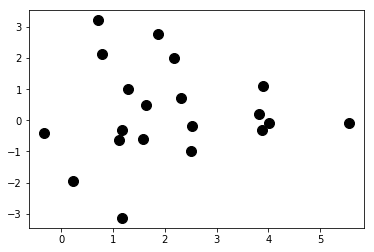

In [31]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(loc=1,scale=1.5, size=n)[:,np.newaxis]
    m2 = np.random.normal(loc=1,scale=1.0, size=n)[:,np.newaxis]
    return m1+m2, m1-m2

x, y = measure(20)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

plt.plot(x,y,'ok',markersize=10);


In [32]:
# Without Bokeh
# def plot_dists(cx,cy):
#     fig, ax = plt.subplots();
#     ax.plot(x,y,'ok',markersize=10)
#     ax.plot(cx,cy,'or', markersize=15);
#     [ax.plot([cx,x[i]],[cy,y[i]],'--r') for i in range(len(x))];
#     print np.sum(cx-x + cy-y)

# print 'mean values: ', x.mean(), y.mean()
# from ipywidgets import interact, HTML, FloatSlider
# interact(plot_dists,cx=(x.mean()-3,x.mean()+3,.1),cy=(y.mean()-3,y.mean()+3,.1));

In [33]:
cx = np.asarray([1 for i in range(len(x))])[:,np.newaxis]
cy = np.asarray([1 for i in range(len(x))])[:,np.newaxis]
df = pd.DataFrame(data=np.concatenate((x,y,cx,cy),axis=1),columns=['x','y','cx','cy'])
source = ColumnDataSource(data=df)
p = figure(plot_width=400, plot_height=400,title="")
p.circle('x', 'y', size=15,source=source, line_color="navy", fill_color="red", fill_alpha=0.99)
p.circle('cx', 'cy', size=15, source=source,line_color="navy", fill_color="blue", fill_alpha=0.99)
p.segment(x0='x', y0='y', x1='cx', y1='cy', color='blue', alpha=0.6, line_width=1, source=source, )

p.title.text = "sum of distances: " +str(np.sum(cx-x + cy-y))

def callback1(source=source,p=p, window=None):
    data = source.data
    f = cb_obj.value
    x, y = data['x'], data['y']
    cx = data['cx']
    cy = data['cy']
    s = 0
    for i in range(len(x)):
        s = s + cy[i]-y[i] + cx[i]-x[i]
        cx[i] = f
    p.title.text = "sum of distances: " +str(s)
    source.change.emit()
    

slider1 = Slider(start=0.1, end=4, value=1, step=.1, title="cx",
                callback=CustomJS.from_py_func(callback1))


def callback2(source=source,p=p, window=None):
    data = source.data
    f = cb_obj.value
    x, y = data['x'], data['y']
    cx = data['cx']
    cy = data['cy']
    s = 0
    for i in range(len(x)):
        s = s + cy[i]-y[i] + cx[i]-x[i]
        cy[i] = f
    p.title.text = "sum of distances: " +str(s)
    source.change.emit()
    

slider2 = Slider(start=0.1, end=4, value=1, step=.1, title="cy",
                callback=CustomJS.from_py_func(callback2))

layout = column(slider1,slider2, p)

show(layout)


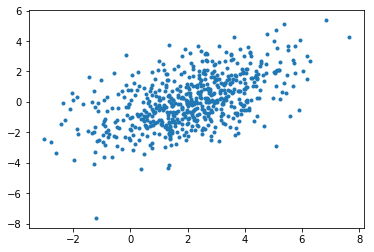

In [35]:
#Now let's generalize this approach for all the other HOS measures

def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(loc=1,scale=1.5, size=n)[:,np.newaxis]
    m2 = np.random.normal(loc=1,scale=0.8, size=n)[:,np.newaxis]
    return m1+m2, m1-m2

m1, m2 = measure(600)
X = np.concatenate((m1,m2),axis=1)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

Xg, Yg = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
val_grids = np.vstack([Xg.ravel(), Yg.ravel()]).T
plt.plot(m1,m2,'.');

[ 2.14668261 -0.01525667]
[-2.69139217  5.36623937]
[ 7.30729572  4.70995936]
[-2.69139217 -4.2154487 ]


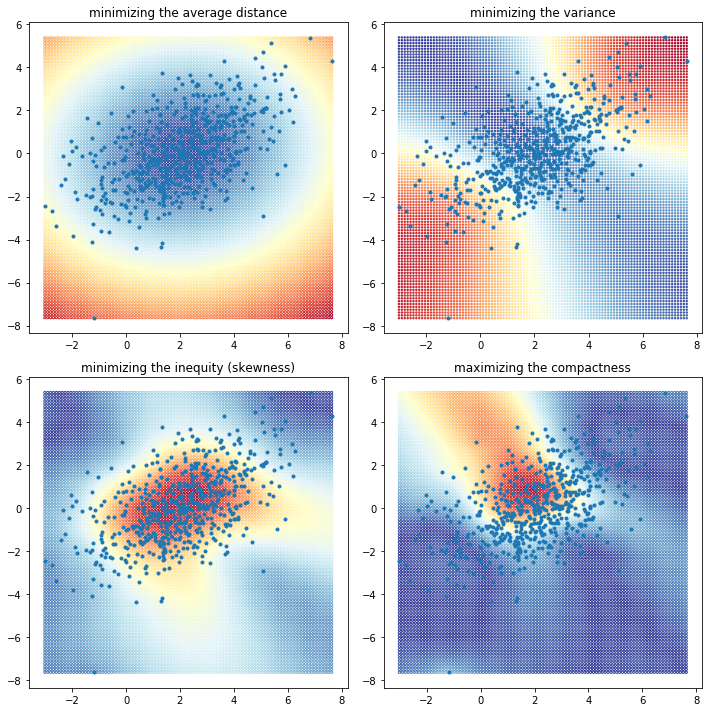

In [36]:
import scipy.spatial.distance as DIST
fig = plt.figure(figsize=(10,10))
Optimum_p = []
Optimum_ind = []
Dists = DIST.cdist(val_grids,X)

plt.subplot(2,2,1)
plt.plot(m1,m2,'.')
plt.subplot(2,2,2)
plt.plot(m1,m2,'.')
plt.subplot(2,2,3)
plt.plot(m1,m2,'.')
plt.subplot(2,2,4)
plt.plot(m1,m2,'.')



plt.subplot(2,2,1)
#First moment
mean_dist = np.abs([np.mean(D) for D in Dists])
# plt.plot(val_grids,mean_dist,'.')
mn = np.min(mean_dist)
mx = np.max(mean_dist)
rng = mx-mn
var = (mean_dist-mn)/float(rng)
plt.scatter(val_grids[:,0],val_grids[:,1],marker='o',s=5,edgecolor=plt.cm.RdYlBu_r(var) ,vmin=mn,vmax=mx,facecolor='None')
# plt.scatter(val_grids[:,0],val_grids[:,1],s=20, c=mean_dist,ma)
print val_grids[np.argmin(mean_dist)]
Optimum_p.append(val_grids[np.argmin(np.abs(mean_dist))])
Optimum_ind.append(np.argmin(np.abs(mean_dist)))
plt.title('minimizing the average distance')




plt.subplot(2,2,2)

second_m = np.abs([np.std(D) for D in Dists])
# second_m = [stats.moment(D,moment=2) for D in Dists]

# plt.plot(val_grids,second_m,'.')


mn = np.min(second_m)
mx = np.max(second_m)
rng = mx-mn
var = (second_m-mn)/float(rng)
plt.scatter(val_grids[:,0],val_grids[:,1],marker='o',s=2,edgecolor=plt.cm.RdYlBu_r(var) ,vmin=mn,vmax=mx,facecolor='None')


print val_grids[np.argmin(np.abs(second_m))]
Optimum_p.append(val_grids[np.argmin(np.abs(second_m))])
Optimum_ind.append(np.argmin(np.abs(second_m)))

plt.title('minimizing the variance')


plt.subplot(2,2,3)
third_m = np.abs([stats.skew(D) for D in Dists])
# third_m = [stats.moment(D,moment=3)[0]/np.power(np.std(D),3) for D in Dists]

mn = np.min(third_m)
mx = np.max(third_m)
rng = mx-mn
var = (third_m-mn)/float(rng)
plt.scatter(val_grids[:,0],val_grids[:,1],marker='o',s=5,edgecolor=plt.cm.RdYlBu_r(var) ,vmin=mn,vmax=mx,facecolor='None')



# plt.plot(val_grids,np.abs(third_m),'.')
print val_grids[np.argmin(np.abs(third_m))]
Optimum_p.append(val_grids[np.argmin(np.abs(third_m))])
Optimum_ind.append(np.argmin(np.abs(third_m)))
plt.title('minimizing the inequity (skewness)')


plt.subplot(2,2,4)

fourth_m = np.abs([stats.kurtosis(D) for D in Dists])
# fourth_m = [stats.moment(D,moment=4) for D in Dists]
# plt.plot(val_grids,fourth_m,'.')
mn = np.min(fourth_m)
mx = np.max(fourth_m)
rng = mx-mn
var = (fourth_m-mn)/float(rng)
plt.scatter(val_grids[:,0],val_grids[:,1],marker='o',s=5,edgecolor=plt.cm.RdYlBu_r(var) ,vmin=mn,vmax=mx,facecolor='None')

plt.title('maximizing the compactness')

print val_grids[np.argmin(np.abs(fourth_m))]

Optimum_p.append(val_grids[np.argmin(np.abs(fourth_m))])
Optimum_ind.append(np.argmin(np.abs(fourth_m)))
plt.tight_layout()

## We will talk about this issue again next week on linear regression
## But later we will see the importance of these "quaility measures" (a.k.a Loss functions) in Machine Learning



# <a></a>


# <a></a>



# Statistics between several variables
## usually we observe several variables at the same time

### Classical statistics
* covariance
* correlations

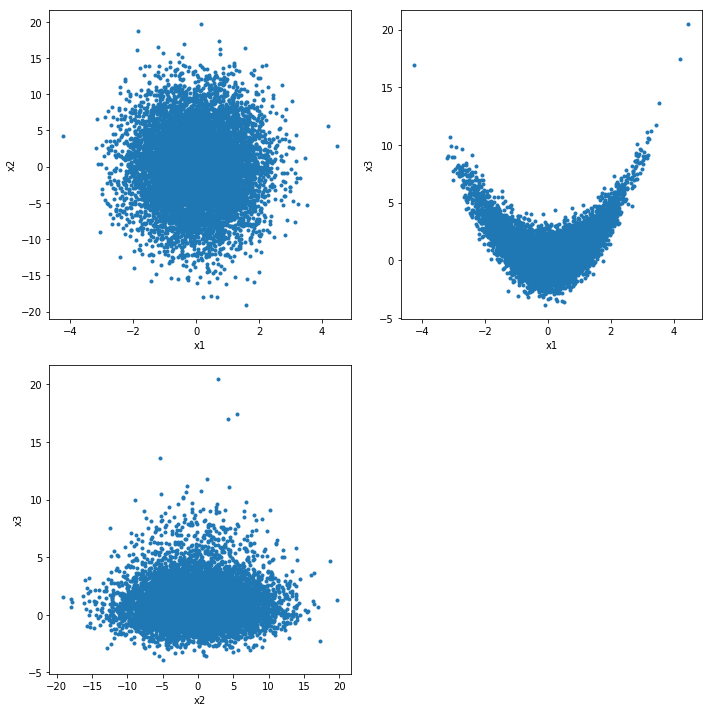

In [37]:
N = 10000

x1= np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]

x3 = x1*x1 +2*x2

x3 = 2*x1 + np.random.normal(loc=.0, scale=1.1, size=N)[:,np.newaxis]
# x3 = 2*x1

x3 = x1*x1 + np.random.normal(loc=.0, scale=1.1, size=N)[:,np.newaxis]
# x3 = 2*x1*x1

fig = plt.figure(figsize=(10,10))

ax1= plt.subplot(2,2,1)
plt.plot(x1,x2,'.');
plt.xlabel('x1');
plt.ylabel('x2');


ax2= plt.subplot(2,2,2)
plt.plot(x1,x3,'.');
plt.xlabel('x1');
plt.ylabel('x3');

ax3= plt.subplot(2,2,3)
plt.plot(x2,x3,'.');
plt.xlabel('x2');
plt.ylabel('x3');
plt.tight_layout()

In [38]:
#Pandas library
Data= np.concatenate((x1,x2,x3),axis=1)
DF = pd.DataFrame(data=Data,columns=['x1','x2','x3'])
DF.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,-0.000726,-0.012407,1.002301
std,1.001976,4.972298,1.783819
min,-4.235157,-19.115499,-3.896439
25%,-0.675720,-3.350807,-0.153143
50%,0.004632,-0.031390,0.752962
75%,0.677471,3.324542,1.844175
max,4.471010,19.704460,20.493726


In [39]:
#Expected value
avg = np.sum(x1)/len(x1)
print "mean value of x1 is {}".format(avg)

#Variance and standard deviation
sigma = np.sum(np.power((x1-avg),2))/(len(x1)-1)

print "standard deviation of x1 is {}".format(np.sqrt(sigma))
print "variance of x1 is {}".format(sigma)

#Covariance 
cov = np.sum((x1-x1.mean())*(x1-x1.mean()))/(len(x1)-1)
print 'covariance of x1 and x1 is {}'.format(cov)


#Covariance 
cov = np.sum((x1-x1.mean())*(x2-x2.mean()))/(len(x1)-1)
print 'covariance of x1 and x2 is {}'.format(cov)

#Covariance 
cov = np.sum((x1-x1.mean())*(x3-x3.mean()))/(len(x1)-1)
print 'covariance of x1 and x3 is {}'.format(cov)

#Covariance 
cov = np.sum((x2-x2.mean())*(x3-x3.mean()))/(len(x1)-1)
print 'covariance of x2 and x3 is {}'.format(cov)



mean value of x1 is -0.000726449620005
standard deviation of x1 is 1.00197551154
variance of x1 is 1.00395492572
covariance of x1 and x1 is 1.00395492572
covariance of x1 and x2 is -0.0649532797198
covariance of x1 and x3 is -0.00647457320974
covariance of x2 and x3 is 0.136014676144


# Correlation
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bb20ca021c7e440a88d006f541d2dde73e23d4aa" width =600, height=400/>


In [40]:
np.corrcoef(DF.values.T)

array([[ 1.        , -0.01303728, -0.00362246],
       [-0.01303728,  1.        ,  0.01533479],
       [-0.00362246,  0.01533479,  1.        ]])

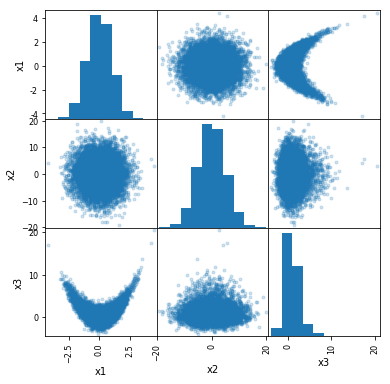

In [41]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

# Basic Statistical methods stay at this level, while it is extremely limitted to:
* **one to one relations**
* **linear relations**



<span style="color:red;font-size: 2em;line-height: 100%;"> In comparison, in ML we are interested in learning nonlinear patterns in "action" and not just prooving the nonlinearities. </span>


# And in reality we usually deal with multi-dimensional joint probabilities
## We are interested in generalization from observations, which means
* ### Generating new instances 
* ### predicting some aspects
* ### Pattern recognition, clustering and classification

# Density Learning
### non-parametric density functions 

#### Kernel Density Estimation


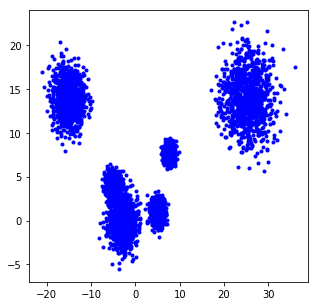

In [42]:
fig = plt.figure()
d0 = 1.6*np.random.randn(1000,2)
d0[:,0]= d0[:,0] - 3
plt.plot(d0[:,0],d0[:,1],'.b')

d1 = .6*np.random.randn(1000,2)+7.6
plt.plot(d1[:,0],d1[:,1],'.b')

d2 = .8*np.random.randn(1000,2)
d2[:,0]= d2[:,0] + 5
d2[:,1]= d2[:,1] + 1
plt.plot(d2[:,0],d2[:,1],'.b')

d3 = .8*np.random.randn(1000,2)
d3[:,0]= d3[:,0] - 5
d3[:,1]= d3[:,1] + 4
plt.plot(d3[:,0],d3[:,1],'.b')


d4 = 1.8*np.random.randn(1000,2)
d4[:,0]= d4[:,0] - 15
d4[:,1]= d4[:,1] + 14
plt.plot(d4[:,0],d4[:,1],'.b')


d5 = 2.8*np.random.randn(1000,2)
d5[:,0]= d5[:,0] + 25
d5[:,1]= d5[:,1] + 14
plt.plot(d5[:,0],d5[:,1],'.b')

fig.set_size_inches(5,5)
Data = np.concatenate((d0,d1,d2,d3,d4,d5))

In [43]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
m1,m2 = Data[:,0],Data[:,1]

xmin = Data[:,0].min()
xmax = Data[:,0].max()
ymin = Data[:,1].min()
ymax = Data[:,1].max()
Xg, Yg = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]


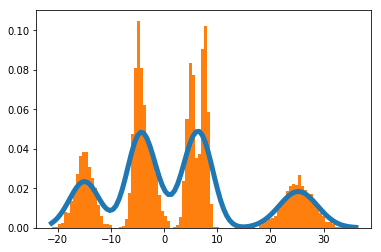

In [44]:

val_grids = Xg
# values = np.vstack([m1, m2])
# values = Data.T
kernel = stats.gaussian_kde(Data[:,0])
Z = kernel(val_grids.ravel())


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(val_grids.ravel(),Z,linewidth=5);
ax.hist(Data[:,0],bins=100,normed=True);
plt.show()

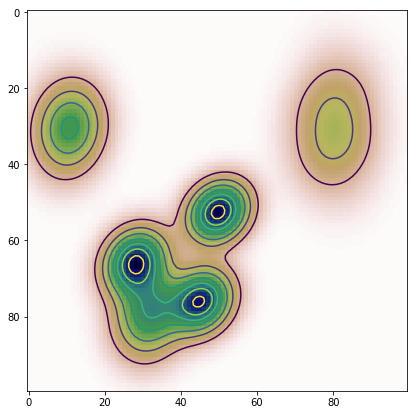

In [45]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([m1, m2])
values = Data.T
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,)
plt.contour(np.rot90(Z))
# ax.plot(m1, m2, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
fig.set_size_inches(7,7)
plt.show()

# Next session...

### Kernel Density Estimation and Regression Problems in the Context of Function Approximation
### High dimensional data sets
### Self Organizing Maps (SOM) in comparison
